<a href="https://colab.research.google.com/github/Samgomes2510/Projeto_arvore_decisao/blob/main/Construcao_logica_arvore_decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt



In [5]:
X_test = pd.read_csv("x_test.csv", delimiter=',')
X_train = pd.read_csv("x_train_balanced.csv", delimiter=',')
y_train = pd.read_csv("y_train_balanced.csv", delimiter=',')
y_test = pd.read_csv("y_test.csv", delimiter=',')

In [6]:
X_test

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Genero_Encoder,Pais_GERMANY,Pais_SPAIN
0,686,36.0,3,95848.58,2,0.0,1.0,7144694.0,1,False,False
1,703,35.0,1,0.00,1,1.0,1.0,14136462.0,1,False,False
2,730,26.0,6,0.00,1,1.0,1.0,1011687.0,1,False,True
3,675,33.0,6,0.00,2,0.0,1.0,1011687.0,0,False,False
4,754,24.0,3,121513.31,2,0.0,1.0,1011687.0,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...
24922,786,37.0,4,0.00,2,0.0,1.0,1011687.0,0,False,True
24923,592,35.0,7,122724.50,1,1.0,1.0,17773874.0,1,False,False
24924,645,45.0,7,121286.32,1,1.0,1.0,869372.0,1,False,False
24925,567,47.0,1,126447.40,1,1.0,0.0,1011687.0,0,True,False


In [7]:
y_test

,Churn
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
24922,0.0
24923,0.0
24924,0.0
24925,1.0


In [8]:
y_test

,Churn
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
24922,0.0
24923,0.0
24924,0.0
24925,1.0


In [9]:
y_train

,Churn
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
117945,1.0
117946,1.0
117947,1.0
117948,1.0


In [10]:
contagem_classes = y_train.value_counts()
print("Contagem de amostras por classes:")
print(contagem_classes)

Contagem de amostras por classes:
Churn
0.0      58975
1.0      58975
Name: count, dtype: int64


In [11]:
X_train

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Genero_Encoder,Pais_GERMANY,Pais_SPAIN
0,711,35.000000,10,0.000000,2,1.000000,0.000000,5331178.0,1,False,False
1,619,33.000000,7,0.000000,2,0.000000,1.000000,1011687.0,1,False,False
2,841,54.000000,4,102721.490000,1,1.000000,1.000000,1011687.0,1,True,False
3,679,48.000000,6,125161.240000,1,1.000000,0.000000,579659.0,1,False,False
4,656,42.000000,6,0.000000,3,0.000000,0.000000,14233155.0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...
117945,529,43.000000,7,0.000000,1,0.514157,0.000000,1011687.0,1,False,True
117946,639,44.450575,7,0.000000,1,1.000000,0.725287,1011687.0,0,False,True
117947,541,49.890057,6,102744.063633,1,1.000000,0.000000,1011687.0,0,True,False
117948,593,37.911470,5,139949.785268,1,1.000000,0.000000,1011687.0,0,True,False


In [12]:
from sklearn.tree import DecisionTreeClassifier
# Biblioteca que é a implementação de arvore de decisão disponível no scikit-Learn.

In [13]:
arvore_churn = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
# arvore_churn é o nome que escolhe para meu classificador
# 'criterion' define o critério para a qualidade da decisão(usando o indice de gini neste caso)
# 'random_state' define a semente aleatória para garantir a reprodutibilidade dos resultados
arvore_churn.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [14]:
#Vamos Verificar os parametros da nossa 'arvore'
print(arvore_churn.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


In [15]:
previsoes = arvore_churn.predict(X_test[:10])
previsoes

array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])

In [16]:
y_test

,Churn
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
24922,0.0
24923,0.0
24924,0.0
24925,1.0


In [17]:
from sklearn.metrics import accuracy_score, classification_report


#**Aplicando nosso Modelo a base de teste e Avaliando os resultados**

In [18]:
previsoes = arvore_churn.predict(X_test)
acuracia = accuracy_score(y_test, previsoes)
print("Acurácia:", acuracia)

Acurácia: 0.7907891041842179


In [19]:
relatorio = classification_report(y_test, previsoes)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87     19649
         1.0       0.51      0.57      0.53      5278

    accuracy                           0.79     24927
   macro avg       0.69      0.71      0.70     24927
weighted avg       0.80      0.79      0.79     24927



In [20]:
matriz_confusao = confusion_matrix(y_test, previsoes)
matriz_confusao

array([[16728,  2921],
       [ 2294,  2984]])

In [25]:
plt.figure(figsize=(20, 10))
plot_tree(arvore_churn, filled=True, feature_names=X_train.columns, class_names=['0', '1'])
plt.show()

KeyboardInterrupt: 

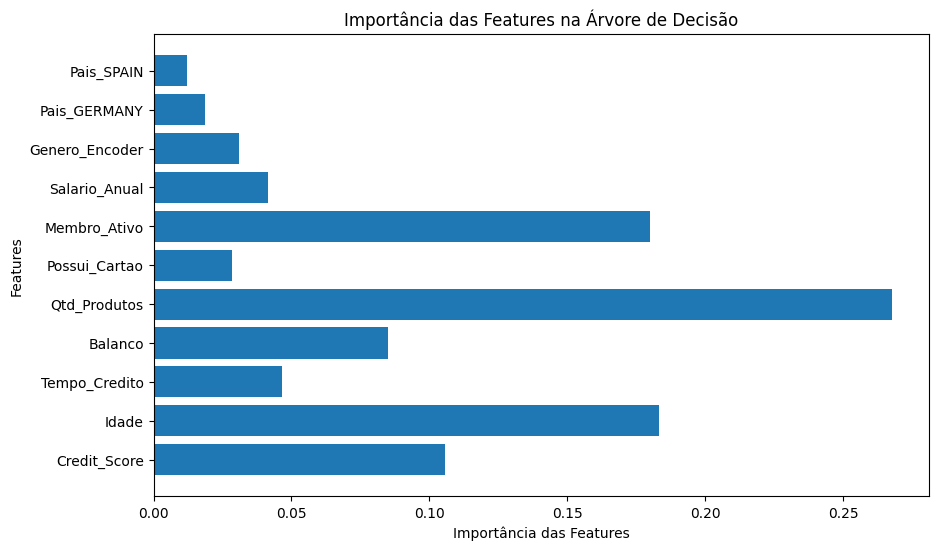

In [26]:
#Obtendo a Inportância das Caracteristicas do modelo de árvore de decisão
importancias_features = arvore_churn.feature_importances_

# obtendo os nomes das caracteristicas
nomes_features = X_train.columns

#Criando um Gráfico de barras para visualizar a importâncias das caracteristicas
plt.figure(figsize=(10, 6))
plt.barh(nomes_features, importancias_features)
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features na Árvore de Decisão')
plt.show()

#**Vamos refinar nosso modelo apenas com as 3 principais Features e verificarcomo fica nosso desempenho e nossa árvore de**

In [27]:
X_train_reduzido = X_train[['Qtd_Produtos', 'Membro_Ativo', 'Idade']]
X_test_reduzido = X_test[['Qtd_Produtos', 'Membro_Ativo', 'Idade']]

In [28]:
arvore_churn_reduzido = DecisionTreeClassifier(criterion='gini', random_state = 0)
arvore_churn_reduzido.fit(X_train_reduzido, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
previsoes_reduzido = arvore_churn_reduzido.predict(X_test_reduzido)

In [30]:
relatorio = classification_report(y_test, previsoes_reduzido)
print("Relatório de Classificação:")
print(relatorio)
#

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     19649
         1.0       0.74      0.48      0.59      5278

    accuracy                           0.85     24927
   macro avg       0.81      0.72      0.75     24927
weighted avg       0.84      0.85      0.84     24927



In [31]:
matriz_confusao = confusion_matrix(y_test, previsoes_reduzido)
matriz_confusao

array([[18745,   904],
       [ 2720,  2558]])

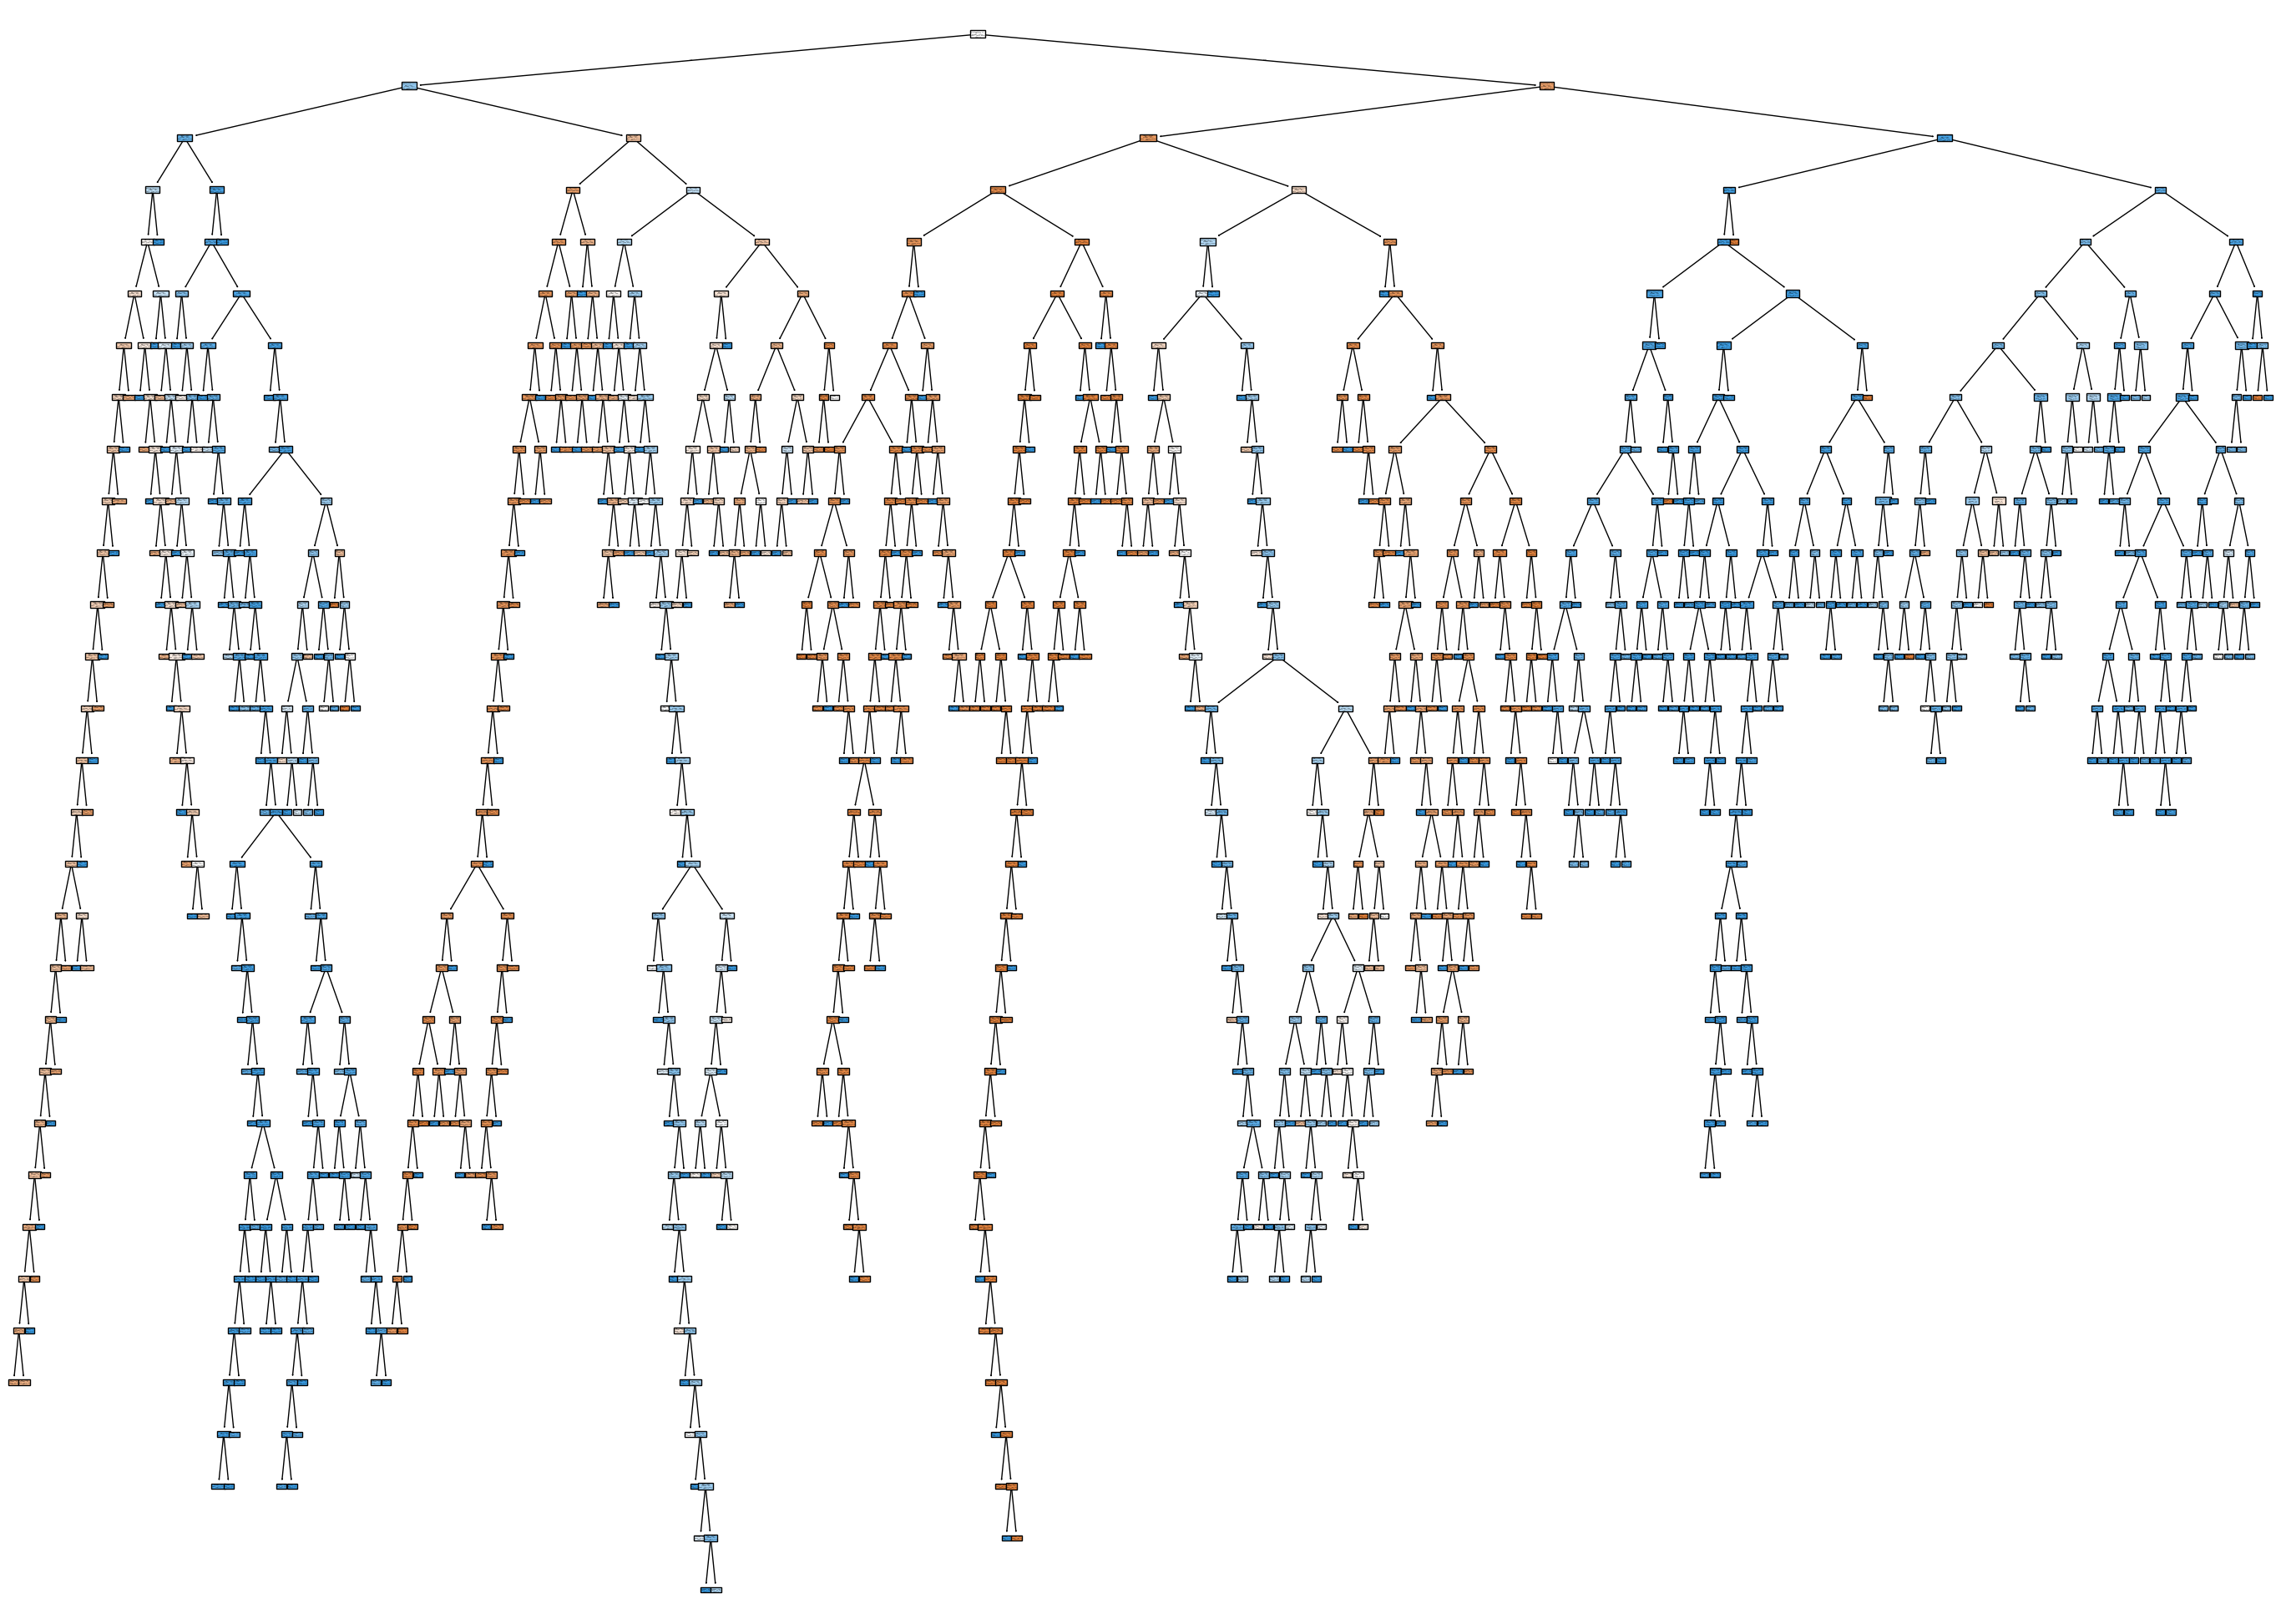

In [32]:
plt.figure(figsize=(35, 25))
plot_tree(arvore_churn_reduzido, filled=True, feature_names=X_train_reduzido.columns, class_names=['0', '1'])
plt.show()

In [33]:
#Criamos um Modelo de arvore de decisão com Profundidade 1
arvore_profundidade_1 = DecisionTreeClassifier(max_depth=1, random_state = 0)
arvore_profundidade_1.fit(X_train_reduzido, y_train)

DecisionTreeClassifier(max_depth=1, random_state=0)

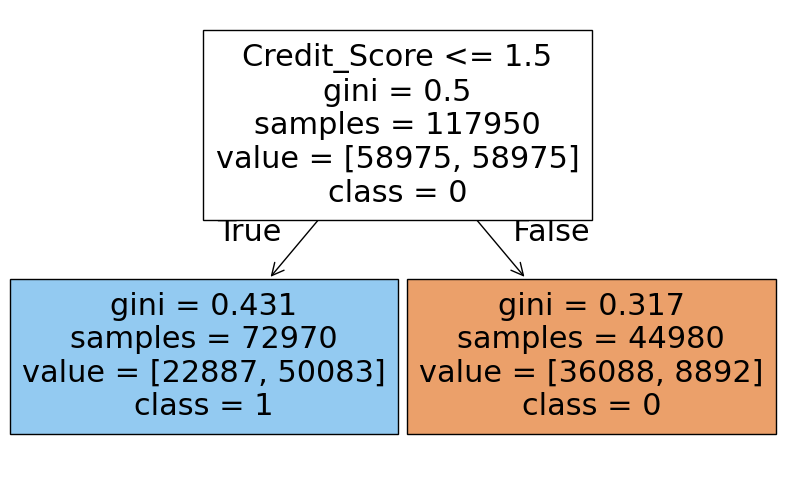

In [34]:
plt.figure(figsize=(10, 6))
plot_tree(arvore_profundidade_1, filled=True, feature_names=X_train.columns, class_names=['0', '1'])
plt.show()